In [38]:
import pandas as pd 


In [39]:
data = pd.read_csv("empleados.csv")
data.shape 

(1470, 35)

In [20]:
data. head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
#Grouping the employee details by Department
data.groupby(data['Department']).agg("sum")

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,2382,NoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNo...,Travel_RarelyTravel_RarelyNon-TravelNon-Travel...,47347,548,187,MedicalHuman ResourcesHuman ResourcesHuman Res...,63,75932,169,...,182,5040,49,728,161,184,456,223,112,231
Research & Development,35598,NoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYe...,Travel_FrequentlyTravel_RarelyTravel_Frequentl...,775384,8788,2786,Life SciencesOtherLife SciencesMedicalLife Sci...,961,967250,2637,...,2603,76880,773,10900,2684,2619,6597,3993,2054,3925
Sales,16298,YesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYe...,Travel_RarelyTravel_RarelyTravel_RarelyTravel_...,356923,4177,1309,Life SciencesLife SciencesLife SciencesMarketi...,446,463370,1195,...,1202,35680,345,4953,1270,1256,3249,2001,1050,1905


In [33]:
#Agrupas por departamento pero solo muestras el departamento y la edad 
# los que no funcionan son median mean y std 
data[['Age', 'Department']].groupby(data['Department']).agg('max')

,Age,Department
Department,,
Human Resources,59,Human Resources
Research & Development,60,Research & Development
Sales,60,Sales


In [34]:
data[['Age', 'Department']].groupby(data['Department']).agg('count')

,Age,Department
Department,,
Human Resources,63,63
Research & Development,961,961
Sales,446,446


In [35]:
data[['Age', 'Department']].groupby(data['Department']).agg('nunique')

,Age,Department
Department,,
Human Resources,30,1
Research & Development,43,1
Sales,42,1


In [41]:
data.loc[data.groupby(data['Department'])['MonthlyIncome'].idxmax()][['EmployeeNumber','Department', 'MonthlyIncome']]

,EmployeeNumber,Department,MonthlyIncome
956,1338,Human Resources,19717
190,259,Research & Development,19999
918,1282,Sales,19847


In [42]:
data.loc[data.groupby(data['Department'])['MonthlyIncome'].idxmin()][['EmployeeNumber','Department', 'MonthlyIncome']]

,EmployeeNumber,Department,MonthlyIncome
1222,1714,Human Resources,1555
513,701,Research & Development,1009
764,1056,Sales,1052


In [45]:
data[['Age']].groupby(data['Department']).agg('sum').style.background_gradient(cmap= 'copper')

,Age
Department,
Human Resources,2382
Research & Development,35598
Sales,16298


In [46]:
data[['Age']].groupby(data['Department']).agg('sum').style.background_gradient(cmap= 'Reds')

,Age
Department,
Human Resources,2382
Research & Development,35598
Sales,16298


In [48]:
data[['MonthlyIncome']].groupby(data['Department']).agg('sum')

,MonthlyIncome
Department,
Human Resources,419234
Research & Development,6036284
Sales,3103791


<Axes: xlabel='Department'>

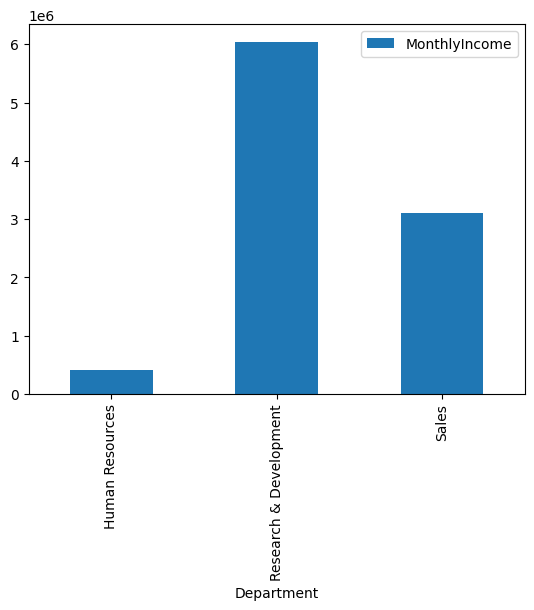

In [49]:
data[['MonthlyIncome']].groupby(data['Department']).agg('sum').plot(kind = 'bar')

<Axes: xlabel='Department'>

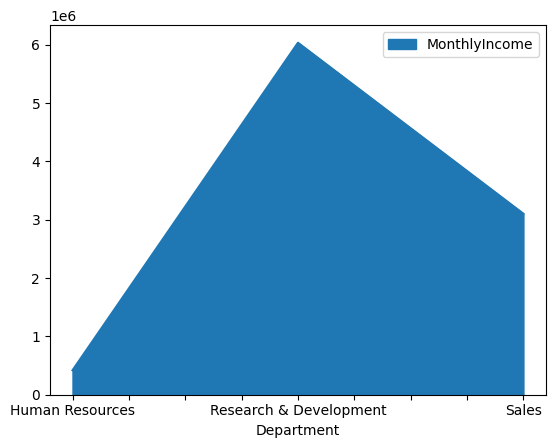

In [50]:
data[['MonthlyIncome']].groupby(data['Department']).agg('sum').plot(kind = 'area')

<Axes: xlabel='Department'>

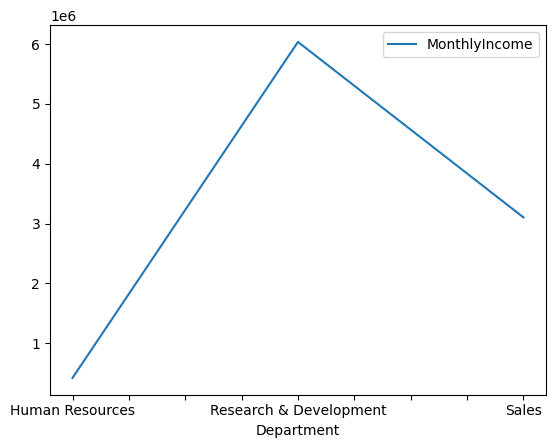

In [51]:
data[['MonthlyIncome']].groupby(data['Department']).agg('sum').plot(kind = 'line')

In [54]:
#pivot tables

data.pivot_table(values='MonthlyIncome', index = 'Department', aggfunc = 'mean')

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


In [59]:
data.pivot_table(values='MonthlyIncome', index = 'Department', aggfunc = 'sum')

,MonthlyIncome
Department,
Human Resources,419234
Research & Development,6036284
Sales,3103791


In [56]:
data.pivot_table(values='MonthlyIncome', index = 'Department', aggfunc = 'mean').style.background_gradient(cmap ='gist_gray')

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


<Axes: xlabel='Department'>

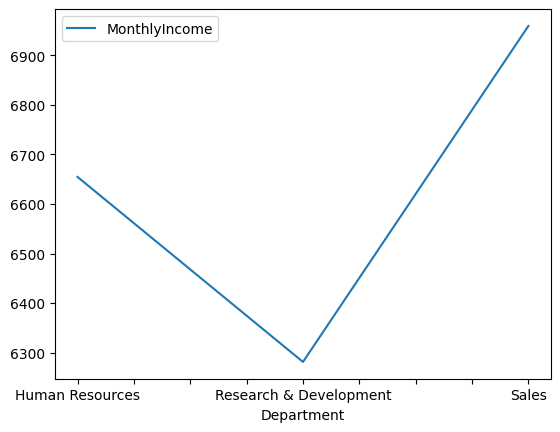

In [57]:
data.pivot_table(values='MonthlyIncome', index = 'Department', aggfunc = 'mean').plot(kind = 'line')

In [58]:
#Los agg aparecen en la parte de arriba a diferencia de la tabla de abajo utilizando groupby
data[['Age','Department']].groupby(data['Department']).agg(['min', 'max'])

Age                  Department                        
                       min max                     min                     max
Department                                                                    
Human Resources         19  59         Human Resources         Human Resources
Research & Development  18  60  Research & Development  Research & Development
Sales                   18  60                   Sales                   Sales

In [60]:
data.pivot_table(values='MonthlyIncome', index = 'Department', aggfunc = 'min')

,MonthlyIncome
Department,
Human Resources,1555
Research & Development,1009
Sales,1052


In [61]:
#Cross Tabulation

data[['Attrition','Department']].head()

,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


In [62]:
pd.crosstab(data['Attrition'], data['Department'])

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


<Axes: xlabel='Attrition'>

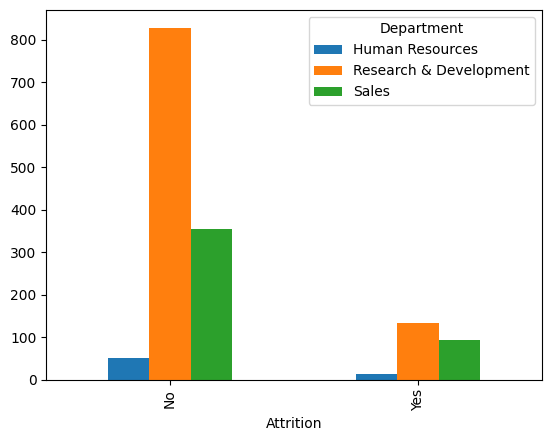

In [63]:
pd.crosstab(data['Attrition'], data['Department']).plot(kind = 'bar')

<Axes: xlabel='Attrition'>

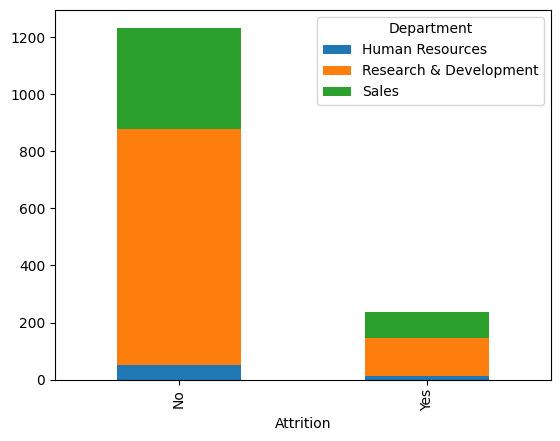

In [64]:
pd.crosstab(data['Attrition'], data['Department']).plot(kind = 'bar',stacked = True)